In [2]:
import os
import sys
import argparse
from os.path import dirname, realpath

sys.path.append("./src/")
sys.path.append(dirname(dirname(realpath(os.getcwd()))))
%run load_Results_12_15a.py
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.isotonic import IsotonicRegression
#!pip install ml_insights
import ml_insights as mli

In [3]:
neg_1 = mp1 [np.where(M1['golds']==0)]
neg_2 = mp2 [np.where(M2 ['golds']==0)]
neg_3 = mp3 [np.where(M3 ['golds']==0)]
neg_4 = mp4 [np.where(M4 ['golds']==0)]
pos_1 = mp1 [np.where(M1 ['golds']==1)]
pos_2 = mp2 [np.where(M2 ['golds']==1)]
pos_3 = mp3 [np.where(M3['golds']==1)]
pos_4 = mp4 [np.where(M4 ['golds']==1)]

In [42]:
pos = pos_1
subneg = np.random.choice( neg_1, 3*sum(gold1))
p_test = tp1
y_test = M_test1['golds']
 
 

### TRY ISO

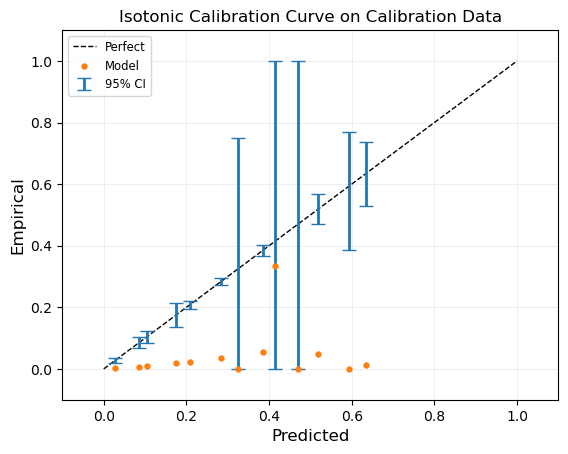

In [51]:

subgold = np.concatenate(( 0*np.ones(len(subneg) )  , 1*np.ones(len(pos)    ) ) )
p_sub = np.concatenate((subneg, pos))
 
iso =  IsotonicRegression(out_of_bounds = 'clip')
iso.fit(  logit(p_sub), subgold)
iso_prob = iso.predict(   logit( p_test) )

custom_bins_a = np.array([0,.01,.02,.03,.05, .1, .3, .5, .75, 1])

mli.plot_reliability_diagram(y_test ,  ( iso_prob) )
#mli.plot_reliability_diagram(y_test ,  ( iso_prob),  bins = custom_bins_a);
tvec = np.linspace(.01, .99, 99)
#plt.plot(tvec, iso.predict( (tvec)), label='Isotonic');
plt.title('Isotonic Calibration Curve on Calibration Data');


In [64]:
pos = pos_1
subneg = np.random.choice( neg_1, 3*sum(gold1))
p_test = tp1
y_test = M_test1['golds']
 
def iso_fun(pos, subneg, p_test, y_test):
        
    subgold = np.concatenate(( 0*np.ones(len(subneg) )  , 1*np.ones(len(pos)    ) ) )
    p_sub = np.concatenate((subneg, pos))
    
    iso =  IsotonicRegression(out_of_bounds = 'clip')
    iso.fit(  ( p_sub), subgold)
    iso_prob =  ( iso.predict(   (  p_test )))

    mli.plot_reliability_diagram(y_test ,  iso_prob) 
    tvec = np.linspace(.01, .99, 99)
    plt.title('Isotonic Calibration Curve on Calibration Data');


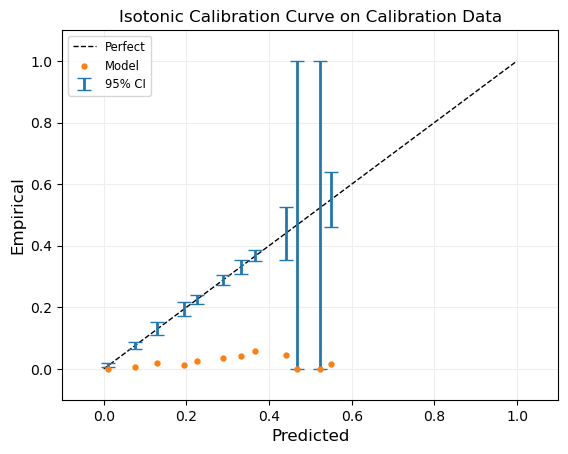

In [68]:
 iso_fun(pos_1, np.random.choice(neg_1, 3*sum(gold1)),  tp1, M_test1['golds'])

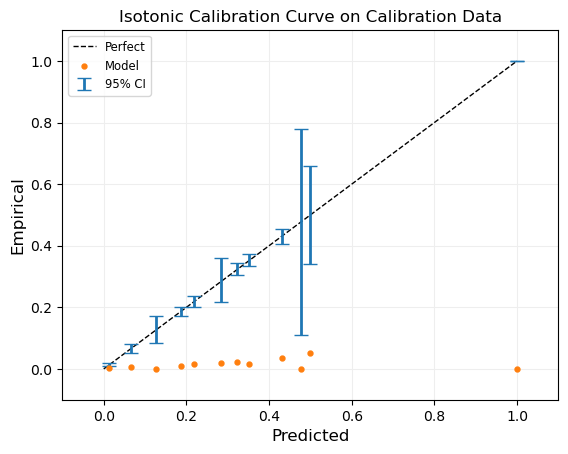

In [71]:
 iso_fun(pos_2, np.random.choice( neg_2, 3*sum(gold2)),  tp2, M_test2['golds'])

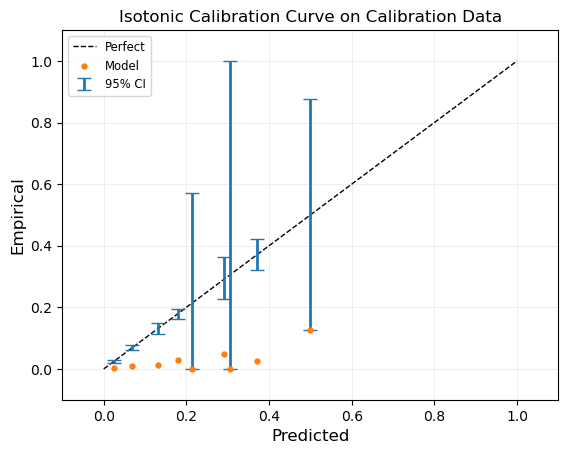

In [73]:
 iso_fun(pos_3, np.random.choice( neg_3, 10*sum(gold3)),  tp3, M_test3['golds'])

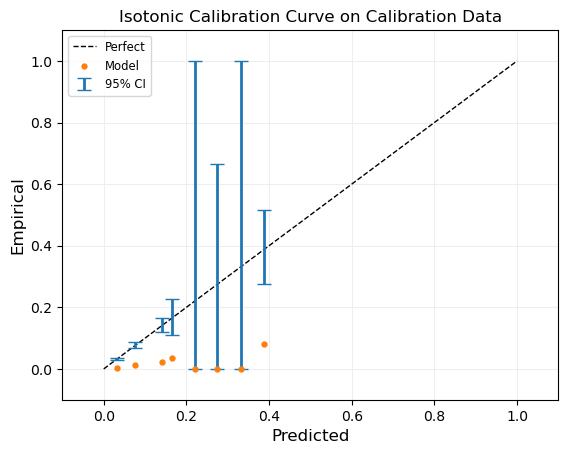

In [76]:
 iso_fun(pos_4, np.random.choice( neg_4, 15*sum(gold4)),  tp4, M_test4['golds'])

In [27]:
subneg3 = np.random.choice( neg_3, sum(gold3))
boot3 = np.concatenate((subneg3, pos_3))
subgold3 = np.concatenate(( 0*np.ones(len(subneg3))  , 1*np.ones(len(subneg3)) ) )

<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

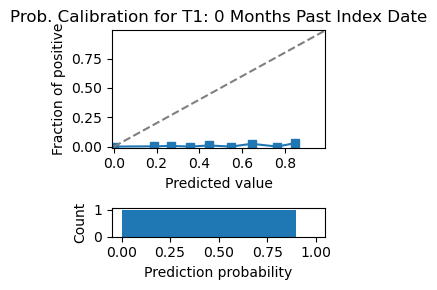

In [29]:
iso3 =isotonic ( logit(boot3),  subgold3,   logit(tp3) )
yi03, pi03 = calibration_curve(M_test3['golds'], iso3 , n_bins = 10)
plotter_b(pi03, yi03, "Prob. Calibration for T1: 0 Months Past Index Date", max_ = .99)

<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

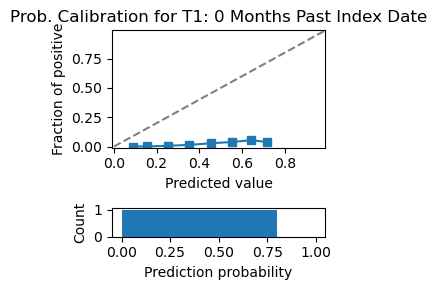

In [16]:
alpha_1  = each_scaling (  logit(boot1) , subgold1, subwts1)
tcal_1 = temp_pred (alpha_1, logit(tp1) )

yy01, pp01 = calibration_curve(M_test1['golds'], tcal_1 , n_bins = 10)

plotter_b(pp01, yy01, "Prob. Calibration for T1: 0 Months Past Index Date", max_ = .99)

(array([9.950e+02, 7.910e+02, 3.120e+02, 1.993e+03, 1.937e+03, 1.731e+03,
        6.037e+03, 1.000e+00, 1.694e+03, 5.610e+02]),
 array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
        0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333]),
 <BarContainer object of 10 artists>)

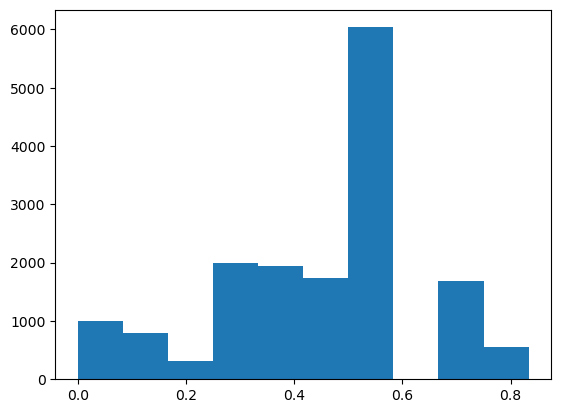

In [23]:
plt.hist( iso1)
 

In [19]:
def subsample_temperature (gold, pos, neg, test):
    subneg = np.random.choice( neg, sum(gold))
    boot = np.concatenate((subneg, pos))
    subgold = np.concatenate(( 0*np.ones(len(subneg))  , 1*np.ones(sum(gold)) ) )
    subwts = np.concatenate((  np.ones(len(subneg))  , np.ones(sum(gold))) ) 
    alpha  = each_scaling (  logit(boot) , subgold, subwts)
    tcal = temp_pred (alpha, logit(test) )
    return tcal

In [20]:
sub_1 = subsample_temperature (gold1, pos_1, neg_1, tp1)
sub_2 = subsample_temperature (gold2, pos_2, neg_2, tp2)
sub_3 = subsample_temperature (gold3, pos_3, neg_3, tp3)
sub_4 = subsample_temperature (gold4, pos_4, neg_4, tp4)


In [21]:

yy01, pp01 = calibration_curve(M_test1['golds'], sub_1 , n_bins = 20)
yy02, pp02 = calibration_curve(M_test2['golds'], sub_2 , n_bins = 20)
yy03, pp03 = calibration_curve(M_test3['golds'], sub_3 , n_bins = 20)
yy04, pp04 = calibration_curve(M_test4['golds'], sub_4, n_bins = 20)

<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

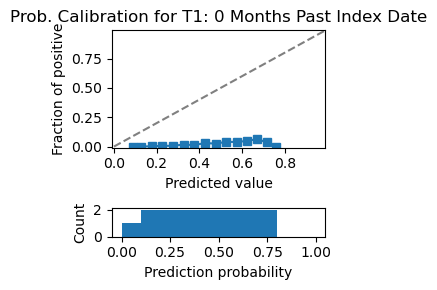

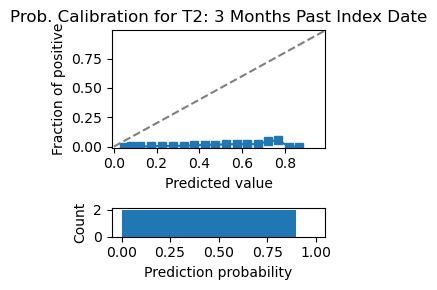

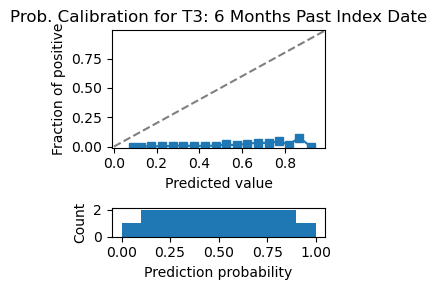

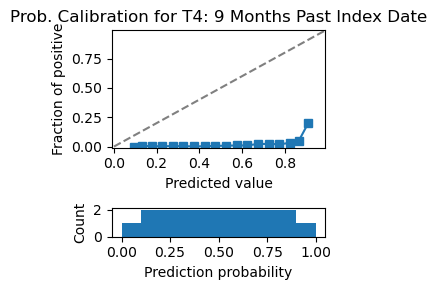

In [22]:

plotter_b(pp01, yy01, "Prob. Calibration for T1: 0 Months Past Index Date", max_ = .99)
plotter_b(pp02, yy02, "Prob. Calibration for T2: 3 Months Past Index Date", max_=.99)
plotter_b(pp03, yy03, "Prob. Calibration for T3: 6 Months Past Index Date", max_=.99)
plotter_b(pp04, yy04, "Prob. Calibration for T4: 9 Months Past Index Date", max_ = .99)

<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

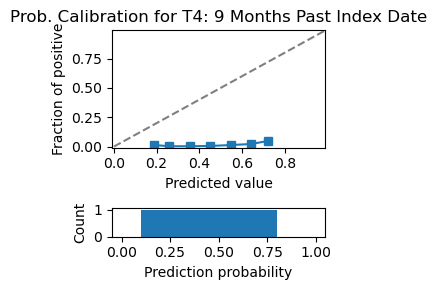

In [35]:
sub_4 = subsample_temperature (gold4, pos_4, neg_4, tp4)
yy04, pp04 = calibration_curve(M_test4['golds'], sub_4 , n_bins = 10)
plotter_b(pp04, yy04, "Prob. Calibration for T4: 9 Months Past Index Date", max_ = .99)


<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

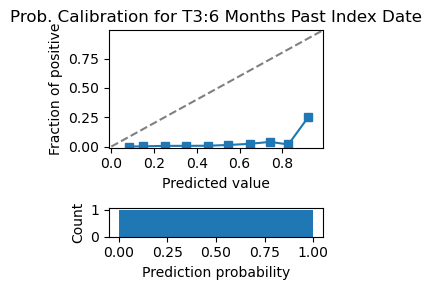

In [36]:
sub_3 = subsample_temperature (gold3, pos_3, neg_3, tp3)
yy03, pp03 = calibration_curve(M_test3['golds'], sub_3 , n_bins = 10)
plotter_b(pp03, yy03, "Prob. Calibration for T3:6 Months Past Index Date", max_ = .99)


<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

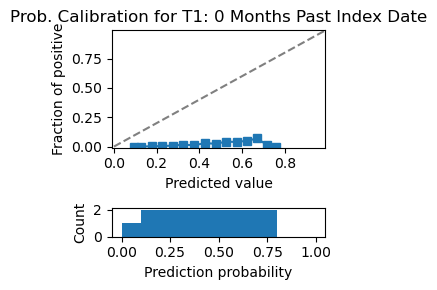

In [30]:
sub_1 = subsample_temperature (gold1, pos_1, neg_1, tp1)
yy01, pp01 = calibration_curve(M_test1['golds'], sub_1 , n_bins = 20)
plotter_b(pp01, yy01, "Prob. Calibration for T1: 0 Months Past Index Date", max_ = .99)


<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

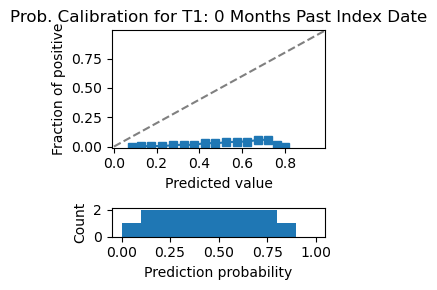

In [22]:
sub_1 = subsample_temperature (gold1, pos_1, neg_1, tp1)
yy01, pp01 = calibration_curve(M_test1['golds'], sub_1 , n_bins = 20)
plotter_b(pp01, yy01, "Prob. Calibration for T1: 0 Months Past Index Date", max_ = .99)


<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

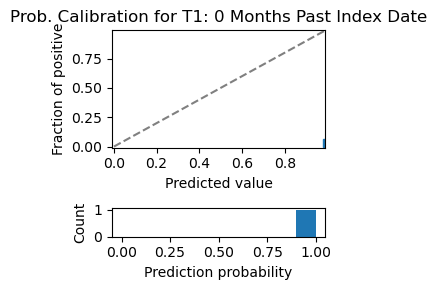

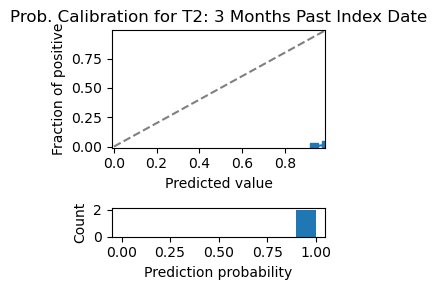

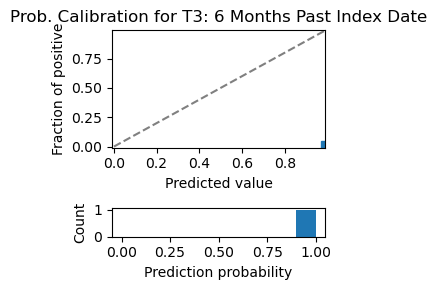

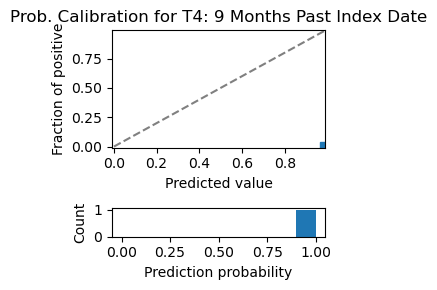

In [144]:
 

alpha_1  = each_scaling (  logit(mp1) , gold1,  wts01)
alpha_2  = each_scaling (  logit(mp2) , gold2,  wts02)
alpha_3  = each_scaling (  logit(mp3) , gold3,  wts03)
alpha_4  = each_scaling (  logit(mp4) , gold4,  wts04)

tcal_1 = temp_pred (alpha_1, logit(tp1) )
tcal_2 = temp_pred (alpha_2, logit(tp2) )
tcal_3 = temp_pred (alpha_3, logit(tp3) )
tcal_4 = temp_pred (alpha_4, logit(tp4) )

yy01, pp01 = calibration_curve(M_test1['golds'], tcal_1 , n_bins = 20)
yy02, pp02 = calibration_curve(M_test2['golds'], tcal_2 , n_bins = 20)
yy03, pp03 = calibration_curve(M_test3['golds'],tcal_3 , n_bins = 20)
yy04, pp04 = calibration_curve(M_test4['golds'], tcal_4, n_bins = 20)

plotter_b(pp01, yy01, "Prob. Calibration for T1: 0 Months Past Index Date", max_ = .99)
plotter_b(pp02, yy02, "Prob. Calibration for T2: 3 Months Past Index Date", max_=.99)
plotter_b(pp03, yy03, "Prob. Calibration for T3: 6 Months Past Index Date", max_=.99)
plotter_b(pp04, yy04, "Prob. Calibration for T4: 9 Months Past Index Date", max_ = .99)

In [127]:
( confusion_matrix (M_test4['golds'],  tp4>.5) )

array([[10555,     0],
       [   96,     0]], dtype=int64)

In [24]:
wts01 = np.where(gold1 == 1, 1/.064, 1)
wts02 = np.where(gold2 == 1, 1/.064, 2)
wts03 = np.where(gold3 == 1, 1/.064, 3)
wts04 = np.where(gold4 == 1, 1/.064, 4)

In [25]:
wts1234 = np.concatenate((wts01,wts02, wts03, wts04))
y1234 = np.concatenate((gold1,gold2, gold3, gold4))
lo1234 = logit( np.concatenate((mp1,mp2, mp3, mp4)) )
tlo1234 = logit( np.concatenate((tp1,tp2, tp3, tp4)) )
ti = np.concatenate((np.ones(len(mp1)), 2*np.ones(len(mp2)), 3*np.ones(len(mp3)), 4*np.ones(len(mp4))))
tti = np.concatenate((np.ones(len(tp1)), 2*np.ones(len(tp2)), 3*np.ones(len(tp3)), 4*np.ones(len(tp4))))

In [26]:
def weighted_temp2_scaling (logits, y, wts):
    def temperature_obj(t):
        temp_logits =   (logits + t[1]) /  t [0]  
        probs = expit(temp_logits)
        return log_loss(y, probs, sample_weight=wts)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

In [27]:
def temp_pred2 (alpha,  test_logit):    
    logi =  (test_logit + alpha[1])/ alpha[0]     
    proba = expit ( logi   ) #*tt.x[5]    
    return proba

In [28]:
alpha_t_1234  = weighted_temp2_scaling(  lo1234 , y1234,  wts1234)


In [29]:
pc = temp_pred2(alpha_t_1234, tlo1234 )

(array([26103., 10963.,  6840.,  4450.,  2760.,  1796.,  1117.,   628.,
          171.,    40.]),
 array([0.00420472, 0.0767673 , 0.14932988, 0.22189246, 0.29445504,
        0.36701762, 0.4395802 , 0.51214278, 0.58470536, 0.65726794,
        0.72983052]),
 <BarContainer object of 10 artists>)

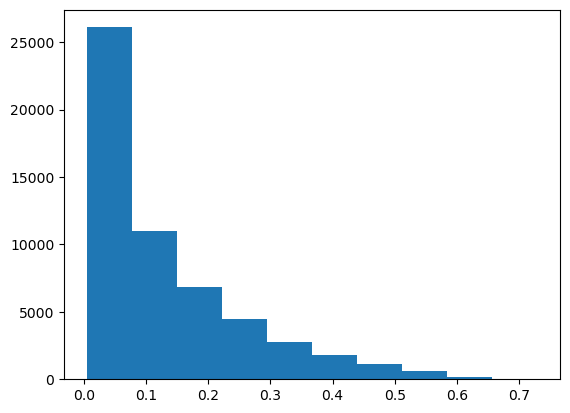

In [30]:
plt.hist(pc)

In [17]:
wp1 =  pc [tti==1]
wp2 =  pc [tti==2]
wp3 =  pc [tti==3]
wp4 =  pc [tti==4]

In [ ]:
plotter(p04, y04)

<module 'matplotlib.pyplot' from 'D:\\Programs\\Anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

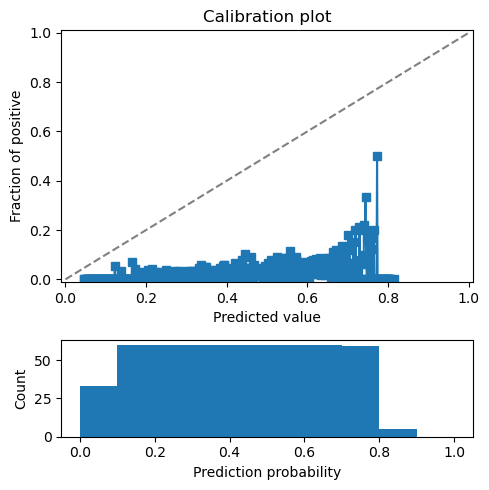

In [20]:
plotter(p01, y01)

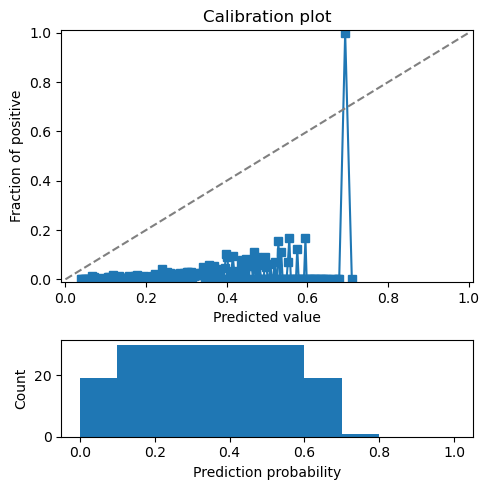

In [67]:
plotter(p03, y03)

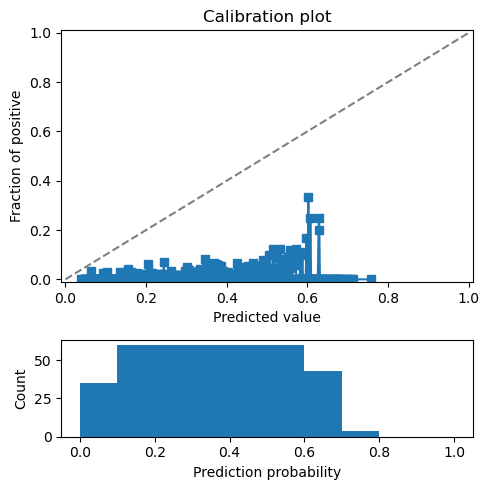

In [68]:
plotter(p02, y02)

In [69]:
import sklearn
from sklearn.metrics import confusion_matrix

In [70]:
[sklearn.metrics.roc_auc_score(tgold4,  tp4 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold3,  tp3 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold2,  tp2 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold1,  tp1 , average = 'samples')]


[0.754709382855384, 0.7132108023602834, 0.6764938403022082, 0.6667921165559247]

In [71]:
[sklearn.metrics.roc_auc_score(tgold4,  wp4 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold3,  wp3 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold2,  wp2 , average = 'samples'),
sklearn.metrics.roc_auc_score(tgold1,  wp1 , average = 'samples')]

[0.754709382855384, 0.7132108023602834, 0.6764938403022082, 0.6667921165559247]

In [52]:
( confusion_matrix (tgold1,  wp1>.5) )

array([[11826,  3826],
       [  276,   204]], dtype=int64)

In [53]:
( confusion_matrix (tgold2,  wp2>.5) )

array([[13724,   282],
       [  212,     8]], dtype=int64)

In [54]:
( confusion_matrix (tgold3,  wp3>.5) )

array([[12585,    91],
       [  150,     3]], dtype=int64)

In [55]:
( confusion_matrix (tgold4,  wp4>.5) )

array([[11479,   101],
       [   94,     7]], dtype=int64)

In [ ]:
np1 =  (1-pc) [ti==1]
np2 =  (1-pc) [ti==2]
np3 =  (1-pc) [ti==3]
np4 =  (1-pc) [ti==4]

In [1534]:
wts1 = np.where(gold1 == 1, 1/( np1 *np.mean(gold1)), 1/ wp1)
wts2 = np.where(gold2 == 1, 1/( np2 *np.mean(gold2)), 2/ wp2)
wts3 = np.where(gold3 == 1, 1/( np3 *np.mean(gold3)), 3/wp3 )
wts4 = np.where(gold4 == 1, 1/( np4 *np.mean(gold4)), 4/wp4 )

In [1535]:
def temperature_multi_w(l1, l2,l3,l4, y1, y2, y3, y4, w1, w2, w3, w4):
    def temperature_obj(t):
        logi_1 = (l1 +  t[1])  / t[5] 
        logi_2 = (l2 +  t[2])  / t[6] 
        logi_3 = (l3 +  t[3])  / t[7] 
        logi_4 = (l4 +  t[4])  / t[8] 
        p1  = expit (t[0] + logi_1  )  
        p2  = expit ( t[0] + logi_2  )  
        p3  = expit (t[0] +  logi_3  )  
        p4  = expit ( t[0] + logi_4  ) 
        total_loss=log_loss(y1,p1,sample_weight=w1)+log_loss(y2,p2,sample_weight=w2)+log_loss(y3,p3,sample_weight=w3)+log_loss(y4,p4,sample_weight=w4)        
        return   total_loss
    r = minimize (temperature_obj, x0 = [.1, .1, .1,.1, 
                                         .1, .1,.1, .1, .1  ] )    
    return  r

In [1536]:
tt  = temperature_multi_w( logit(mp1), logit(mp2), logit(mp3), logit(mp4),
                          gold1, gold2, gold3, gold4, wts1, wts2, wts3, wts4  )

In [1537]:
tt['message']

'Optimization terminated successfully.'

In [1538]:
def temp_pred  ( j1,j2, test_logit):    
    
    logi =  ( test_logit   + j1) / j2     
    proba = expit (  logi + tt.x[0]  )  
    return proba

In [14]:
def each_scaling (logits, y):
    def temperature_obj(t):
        temp_logits =   (logits )/ t [0]  +t[1]
        probs = expit(temp_logits)
        return log_loss(y, probs)    
    res = minimize (temperature_obj,x0 = [.1,.1])
    return res.x

def temp_pred (alpha,  test_logit):    
    logi =  (test_logit )/ alpha[0]  + alpha[1]
    proba = expit ( logi   ) #*tt.x[5]    
    return proba